In [ ]:
#default_exp example_graphs

In [ ]:
%load_ext autoreload
%autoreload 2

# Example directed graphs

> Various functions to generate examples of directed graphs (DAGs),
> mainly graphs from various [related works](01_related.ipynb)

In [ ]:
#hide
from nbdev.showdoc import *

In [ ]:
#export
import networkx as nx
import matplotlib.pyplot as plt


## Crown DAG known as $S_3^0$ graph

Generate crown DAG (Directed Acyclic Graph), also known as $S_3^0$ graph.

This graph is taken from FELINE paper (2014), where it is used to show _falsely-implied path_ or _false-positive_ of the FELINE index.

This graph is shown in Figure 4 of the FELINE paper.

In [ ]:
#export
def crown_DAG():
    """Returns crown DAG known as S_3^0 graph
    
    Returns
    -------
    graph : networkx.DiGraph
        Crown DAG also known as S_3^0 directed graph
    """
    DG=nx.DiGraph()
    DG.add_nodes_from([1,2,3,4,'u','v'])
    DG.add_edges_from([(1,2),(3,4),(1,'v'),(3,'v'),('u',2),('u',4)])
    return DG


### Draw the crown DAG (`crown_DAG()`)

Draw the 6-nodes crown DAG, known as $S_3^0$ graph, using \[automatic\] shell layout:

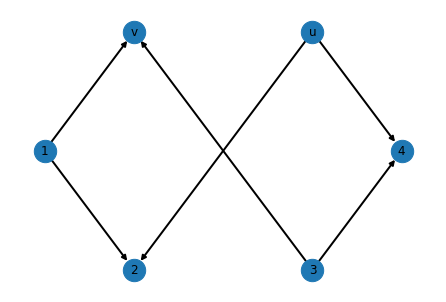

In [ ]:
#@title Draw the $S_3^0$ graph using [automatic] shell layout
DG=crown_DAG()
nx.draw_shell(DG,with_labels=True,node_size=500,width=2.0)

Drawing the crown DAG with circular layout results in the same plot as with shell layout, shown above.

Draw the 6-nodes crown DAG, known as $S_3^0$ graph, using the default spring layout positioning:

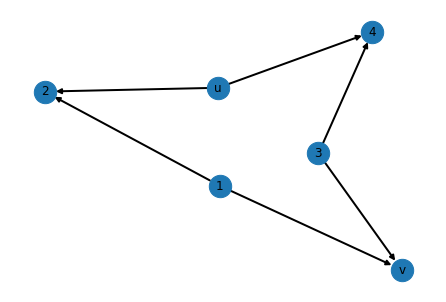

In [ ]:
DG=crown_DAG()
nx.draw(DG,with_labels=True,node_size=500,width=2.0)

In [ ]:
#DG=crown_DAG()
#nx.draw_kamada_kawai(DG,with_labels=True,node_size=500,width=2.0)

Draw the 6-nodes crown DAG, known as the $S_3^0$ graph, using automatic bipartite layout.

This is similar layout to the one used in left side of Figure 4 in the FELINE paper, just with changed order of nodes in each of sets of vertices (each partition).

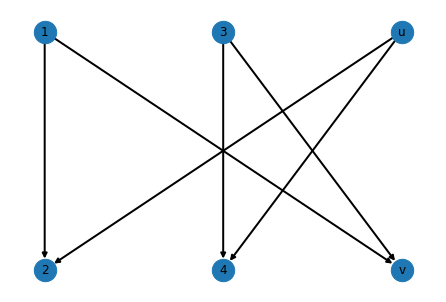

In [ ]:
DG=crown_DAG()
nx.draw(DG,pos=nx.bipartite_layout(DG,[1,'u',3],align='horizontal'),
        with_labels=True,node_size=500,width=2.0)

Draw the crown DAG known as $S_3^0$ graph using weak dominance drawing.

This is the same layout as the one used on right size of Figure 4 in the FELINE paper. It shows example of exception between nodes $u$ and $v$. The <span color="orange">orange</span> arrow is a _falsely implied path_ or a _false-positive_ for the FELINE index.

It is important to notice that some graphs, such as $S_3^0$,
do not admit a 2D index which is free of false-positives.
The weak dominance drawing shown below has the smallest possible number of false-positives for this graph.

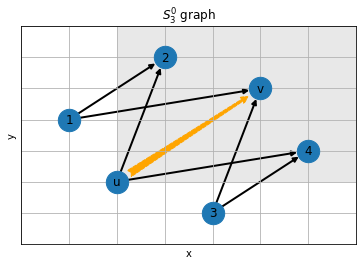

In [ ]:
#@title Draw the $S_3^0$ graph using weak dominance drawing
from matplotlib.patches import Rectangle, FancyArrowPatch

ax=plt.gca()
ax.add_patch(Rectangle((2,2), 5, 5, facecolor="lightgrey",alpha=0.5))
ax.add_patch(
    FancyArrowPatch((2,2),(5,5),
                    shrinkA=15,shrinkB=15,
                    arrowstyle='fancy',mutation_scale=18,
                    linestyle='dashed',hatch='\\',color='orange')
)

plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('$S_3^0$ graph')
plt.xlim(xmin=0,xmax=7)
plt.ylim(ymin=0,ymax=7)

DG=crown_DAG()
DG.pos={1:(1,4),2:(3,6),'u':(2,2),3:(4,1),4:(6,3),'v':(5,5)}
nx.draw_networkx(DG,pos=DG.pos,
                 node_size=500,width=2.0,label='$S_3^0$ graph')

## Create small DAG (example in Figure 2 in FELINE paper)

In [ ]:
#export
def small_DAG_FELINE():
    """Create small DAG (example in Figure 2 in FELINE paper)
        
    Returns
    -------
    graph : networkx.DiGraph
        Small DAG (example in Figure 2 in FELINE paper)
    """
    sd=nx.DiGraph()
    sd.add_nodes_from([chr(c) for c in range(ord('a'),ord('h')+1)])
    sd.add_edges_from([('a','c'),('a','d'),('a','e'),('b','f'),('b','g'),('c','h'),('e','h'),('f','h')])
    return sd


### Draw a small DAG example

Draw using default spring layout (somewhat random)

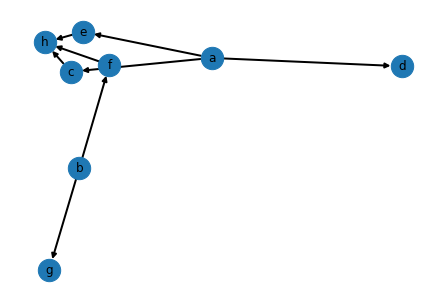

In [ ]:
sd=small_DAG_FELINE()
nx.draw(sd,with_labels=True,node_size=500,width=2.0)

Draw using node positions created with the help of `pydot` module and Graphviz.

We use 'dot' layout algorithm, which creates “hierarchical” or layered drawings of directed graphs. This is the default tool in Graphviz to use if edges have directionality (like in this case).

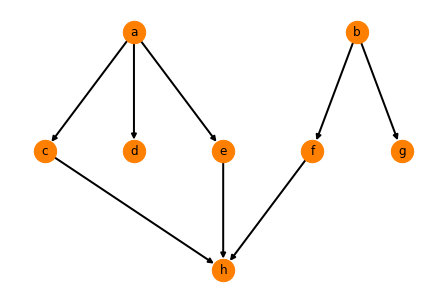

In [ ]:
try:
    import pydot
    
    sd=small_DAG_FELINE()
    pos=nx.drawing.nx_pydot.pydot_layout(sd, prog='dot')
    nx.draw(sd, pos=pos, with_labels=True,
            node_size=500,width=2.0,node_color='#FF7F00')
except ModuleNotFoundError:
    print("'pydot' module not installed")

Draw a small DAG as shown in Figure 2 in the FELINE paper (levels-based, if we use levels starting from sources)

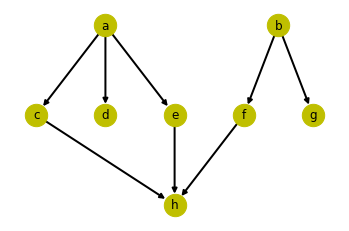

In [ ]:
#@title Draw a small DAG, as in Figure 2 (source levels-based)
limits = plt.axis('off')
sd=small_DAG_FELINE()
nx.draw_networkx(sd,
                 pos={'a':(2,3),'b':(4.5,3),'c':(1,2),'d':(2,2),'e':(3,2),'f':(4,2),'g':(5,2),'h':(3,1)},
                 node_size=500,width=2.0,node_color='y')

Draw a small DAG from FELINE paper using weak dominance drawing

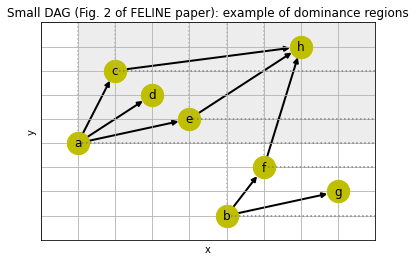

In [ ]:
#@title Draw small DAG using weak dominance drawing
from matplotlib.patches import Rectangle

sd=small_DAG_FELINE()
sd.xy=dict(zip([chr(c) for c in range(ord('a'),ord('h')+1)],
               zip([1,5,2,3,4,6,8,7],[4,1,7,6,5,3,2,8])))

ax=plt.gca()
ax.add_patch(Rectangle(sd.xy['a'], 8, 5, facecolor="lightgrey",alpha=0.4))

for node in sd.nodes:
  if sd.out_degree(node) == 0:
    continue
  (vx,vy)=sd.xy[node]
  #print(node,vx,vy)
  plt.axhline(xmin=vx/9.0,y=vy,color='0.5', ls=':')
  plt.axvline(x=vx,ymin=vy/9.0,color='0.7', ls=':')

plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Small DAG (Fig. 2 of FELINE paper): example of dominance regions')
plt.xlim(xmin=0,xmax=9)
plt.ylim(ymin=0,ymax=9)

nx.draw_networkx(sd,pos=sd.xy,
                 node_size=500,width=2.0,node_color='y')

The above figure shows example of dominance regions for the drawing of a small DAG (Figure 3 of FELINE paper).

## Create a didactic example of a DAG (a tree)

Creates a tree DAG, used as a didactic example in the FELINE paper, where it is shown in Figure 6

In [ ]:
#export
def tree_DAG():
    """Create tree DAG ('didactic example' in Figure 6 in FELINE paper)
    
    The created tree graph has a single source node with out-degree of 3,
    its 3 out-neighbours have out-degrees, respectively, of 2, 1 and 2.
    Out-neighbours of those nodes are sink nodes with out-degree of 0.
    The tree has maximum level of 3.
    
    Below there is ASCII-art rendering of this graph; edges point downward
    
                                'a' 
                              __/|\__
                             /   |   \
                           'b'  'c'  'd'
                           / \   |   / \
                          /  |   |   |  \
                        'e' 'f' 'g' 'h' 'i'
    
    Returns
    -------
    graph : networkx.DiGraph
        Tree DAG (example in Figure 6 in FELINE paper)
    """
    de=nx.DiGraph()
    de.add_nodes_from([chr(c) for c in range(ord('a'),ord('i')+1)])
    de.add_edges_from([('a','b'),('a','c'),('a','d'),
                       ('b','e'),('b','f'),
                       ('c','g'),
                       ('d','h'),('d','i')])
    return de

### Draw a tree DAG (didactic example from Figure 6 in FELINE paper)

Draw using node positions created with the help of `pydot` module and Graphviz, if it is present (installed).

We use 'dot' layout algorithm, which creates “hierarchical” or layered drawings of directed graphs. This is the default tool in Graphviz to use if edges have directionality (like in this case).

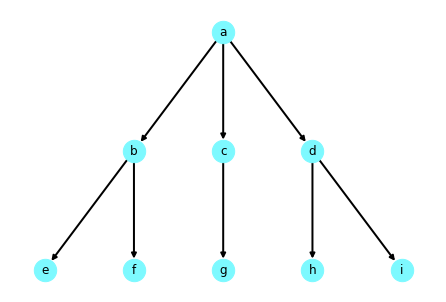

In [ ]:
try:
    import pydot
    
    de=tree_DAG()
    pos=nx.drawing.nx_pydot.pydot_layout(de, prog='dot')
    nx.draw(de, pos=pos, with_labels=True,
            node_size=500,width=2.0,node_color='#7DF9FF')
except ModuleNotFoundError:
    print("'pydot' module not installed")

Draw a didactic example of a DAG, as in Figure 6 (levels-based) of FELINE paper

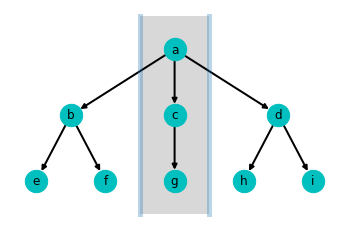

In [ ]:
#@title Draw a didactic example of a DAG, as in Figure 6 (levels-based)
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

de=tree_DAG()

plt.axis('off')
de.tree={
  'a':(3,3),
  'b':(1.5,2),'c':(3,2),'d':(4.5,2),
  'e':(1,1),'f':(2,1),'g':(3,1),'h':(4,1),'i':(5,1)
}

ax=plt.gca()
ax.add_patch(Rectangle((2.5,0.5), 1, 3, facecolor="grey",alpha=0.3))
ax.add_line(Line2D([2.5,2.5], [0.5,3.5],lw=5., alpha=0.3))
ax.add_line(Line2D([3.5,3.5], [0.5,3.5],lw=5., alpha=0.3))

nx.draw_networkx(de,
                 pos=de.tree,
                 node_size=500,width=2.0,node_color='c')

This figure shows a didactic example of a DAG and its two topological orderings obtained by Algorithm 1 in FELINE-index paper.

Given a query $r(a,g)$, all vertices after $g$ in first and second table are discarded (on the left and on the right of $g$). This strategy reduces the search space to only vertices $a$, $c$ and $g$.

Draw a didactic example of a DAG (tree DAG) using weak dominance drawing

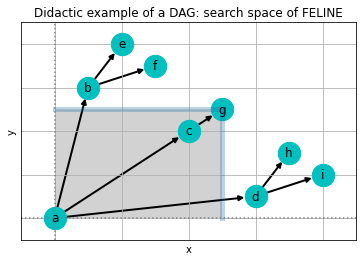

In [ ]:
#@title Draw a didactic example of a DAG using weak dominance drawing
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

de=tree_DAG()
o1=list('abefcgdhi')
o2=list('adihcgbfe')
de.pos={v: (x,0) for (x,v) in enumerate(o1)}
for (y,v) in enumerate(o2):
  de.pos[v]=(de.pos[v][0],y)

ax=plt.gca()
ax.add_patch(Rectangle(de.pos['a'],
                       de.pos['g'][0] - de.pos['a'][0],
                       de.pos['g'][1] - de.pos['a'][1],
                       facecolor="grey",alpha=0.35))
ax.add_line(Line2D([de.pos['g'][0],de.pos['g'][0]],
                   [de.pos['g'][1],de.pos['a'][1]],
                   lw=5., alpha=0.3))
ax.add_line(Line2D([de.pos['g'][0],de.pos['a'][0]],
                   [de.pos['g'][1],de.pos['g'][1]],
                   lw=5., alpha=0.3))

  
plt.axvline(x=de.pos['a'][1],color='0.5', ls=':')
plt.axhline(y=de.pos['a'][0],color='0.5', ls=':')

plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Didactic example of a DAG: search space of FELINE')
plt.xlim(xmin=-1,xmax=9)
plt.ylim(ymin=-1,ymax=9)

nx.draw_networkx(de,pos=de.pos,
                 node_size=500,width=2.0,node_color='c')

**NOTE**: we are skipping figure titled 'Didactic example of a DAG: search space of FERRARI\n(topological ordering x)' in [Reachability labels for version control graphs.ipynb](_Reachability_labels_for_version_control_graphs.ipynb). If it would be added, it would be added in the notebook describing various reachability indices.

----------

In [ ]:
#hide
# this should be the last cell of the notebook
from nbdev.export import notebook2script
notebook2script()

Converted 01_tools.ipynb.
Converted 02_related.ipynb.
Converted 03_example_graphs.ipynb.
Converted index.ipynb.
